# <center>**Segunda lei de Kepler**</center>

**Alunos:** Elison Maiko, Italo Kusmin, Kamylo Porto, Lucas Barcaro. 
<br> **Disciplina:** Calculo Numérico

### Informações importantes
- O arquivo possui $1.260.000$ pontos, como a órbita do planeta tem duração de $45.000$ segundos, logo, temos que em um segundo foram obtidos 28 pontos, em média.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
arquivo = np.load("posicoes.npy")

coords_x = arquivo[:, 0]
coords_y = arquivo[:, 1]

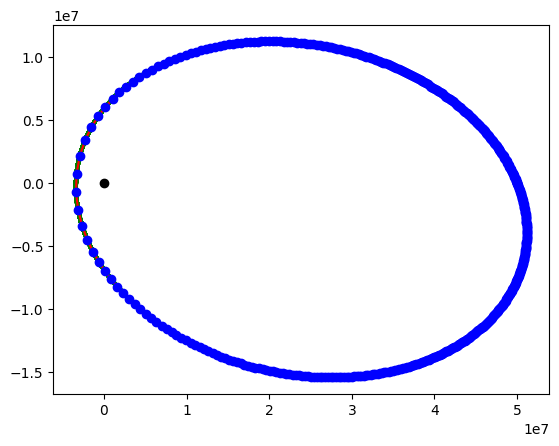

In [91]:
x_values, y_values = [], []

origem = [0, 0]
point_zero = arquivo[0]

for t in range(0, 45000, 100):
    point = arquivo[t]

    x_values.append(point[0])
    y_values.append(point[1])

plt.plot([0], [0], 'ko')

plt.plot(coords_x, coords_y, 'g',linewidth=3)
plt.plot(x_values, y_values, 'bo')

plt.show()

## Método de Heron

Neste método, é dado um tempo inicial e um tempo final. Com essas informações, o programa calcula faz a maior divisão de pontos possíveis, ou seja, entre os intervalos 0 e 1000s podemos ter 1001 pontos. 
Com dois pontos vizinhos e a origem (Terra) é formado um triângulo e calculada a área desse triângulo pelo `Teorema de Heron`. A soma das áreas dos triângulos formados por todos os pontos vizinhos no intervalo é a aproximação da área da região da elipse.

In [92]:
def area_triangulo_Heron (a, b, c):
    ''' Cálcula a área do triângulo a partir das três arestas
    
    Parâmetros
    a : double
        primeira aresta do triângulo

    b : double
        segunda aresta do triângulo 

    c : double
        terceira aresta do triângulo
    
    Retornos
    area : double
        area do triângulo'''
    
    p = (a+b+c)/2
    return np.sqrt(p*(p-a)*(p-b)*(p-c))

def diagonais_triangulo (ponto_1, ponto_2, ponto_3):
    ''' Calcula as distâncias a, b e c do triângulo a
        partir de três pontos recebidos
        
    Parâmetros :
    ponto_1 : array-like dimensão 2
        coordenada do primeiro ponto

    ponto_2 : array-like dimensão 2
        coordenada do segundo ponto
            
    ponto_3 : array-like dimensão 2
        coordenada do terceiro ponto
    
    Retornos:
    a : double 
        distância entre ponto 1 e ponto 2 

    b : double 
        distância entre ponto 2 e ponto 3 
        
    c : double 
        distância entre ponto 1 e ponto 3'''
    
    a = np.sqrt((ponto_2[0]-ponto_1[0])**2 + (ponto_2[1]-ponto_1[1])**2)
    b = np.sqrt((ponto_3[0]-ponto_2[0])**2 + (ponto_3[1]-ponto_2[1])**2)
    c = np.sqrt((ponto_3[0]-ponto_1[0])**2 + (ponto_3[1]-ponto_1[1])**2)

    return a, b, c

In [93]:
def calcula_area_Heron(coords, t_inicio, t_final):
    ''' Calcula a área entre dois pontos dividindo a área em 
        pequenos triangulos e calculando essas áreas pequenas
        pela Fórmula de Heron. 

    Parâmetros:
    coord : array-like dimensão 2
        Coordenadas do objeto no tempo

    t_inicio : double
        tempo da coordenada inicial (entre 0 e 45000)
    
    t_final : double
        tempo da coordenada final (entre 0 e 45000)

    Retornos:
    area : double
        Área da região'''
    
    area = 0

    for i in range (t_inicio, t_final+1, 2):
        a, b, c = diagonais_triangulo([0,0], coords[i], coords[i+1])

        area += area_triangulo_Heron(a, b, c)
    
    return area

In [94]:
def demonstra_metodo_Heron(coords, tempos):
    ''' Calcula as áreas dos intervalos recebidos e plota os intervalos
    
    Parâmetros 
    coords : array-like dimensão 2
        Coordenadas do objeto no tempo
            
    tempos : array-like dimensão 2
        Tempos iniciais e finais de cada intervalo
    
    Retornos
    area_dos_intervalos : array-like
        Área de cada intervalo recebido'''

    area_dos_intervalos = []

    for t in tempos:
        t_inicio, t_final = t[0], t[1]

        area = calcula_area_Heron(coords, t_inicio, t_final)

        for i in range(t_inicio, t_final+1):
            p = coords[i][:]
            plt.plot([0, p[0]], [0, p[1]], '#88B2FF')

        plt.plot([0, coords[t_inicio, 0]], [0, coords[t_inicio, 1]], 'b')
        plt.plot([0, coords[t_final, 0]], [0, coords[t_final, 1]], 'b')

        print(f"A área entre t = {t_inicio} e t = {t_final} é {area}")

        area_dos_intervalos.append(area)

    plt.plot(coords_x, coords_y, '#2ECC71',linewidth=2)
    
    for i in range(0, 45000, 1000):
        plt.plot(coords_x[i], coords_y[i], 'go')
    
    plt.plot([0], [0], 'ko')

    return area_dos_intervalos

A área entre t = 0 e t = 500 é 6351868750000.482
A área entre t = 15000 e t = 15500 é 6351868749998.948
A área entre t = 30000 e t = 30500 é 6351868749996.436


[6351868750000.482, 6351868749998.948, 6351868749996.436]

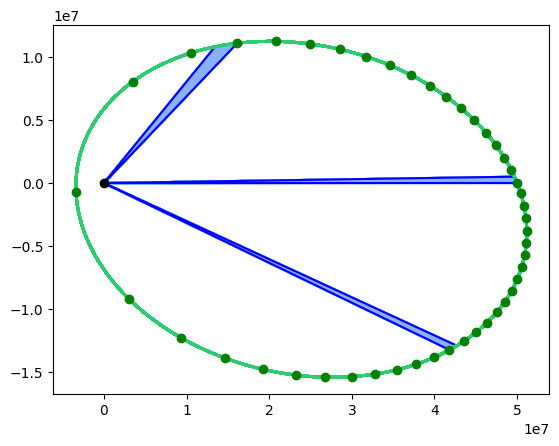

In [95]:
tempo = [[0, 500], [15000, 15500], [30000, 30500]]
demonstra_metodo_Heron(arquivo, tempo)

In [97]:
def calcula_area_NewtonCotes():
    ''' Calcula a área entre dois pontos pelo método de
        Newton-Cotes. 

    -----------------
    Parâmetros:
    coord : array-like
        pontos recebidos pelo professor

    t_inicio : double
        tempo da coordenada inicial (entre 0 e 45000)
    
    t_final : double
        tempo da coordenada final (entre 0 e 45000)

    ----------------
    Retornos:
    area :  double
        Área da região'''
    pass